# Section 1
## Team Information
**Team:** [Equipo 5]
**Members:**
- [Cristian Cruz Orozco ] ([A01665590]) - Data Science and Mathematics Engineering
- [Alan Ulises Luna Hernández] ([A01424523]) - Data Science and Mathematics Engineering
- [Axel Palacios Granados] ([A01666972]) - Data Science and Mathematics Engineering

**Deliverable Links:**
- **Presentation Video:** []
- **Executive Summary:** [Disponible en Canvas]
- **Dataset:** `retail_customer_data.csv`
**Completion Date:** 0[21/11/2025]

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cluster, metrics
from scipy import cluster as sp_cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram


In [ ]:
df_cli = pd.read_csv("retail_customer_data-1.csv")
df_cab = df_cli.head()
df_res = df_cli.describe(include="all")
df_cab



,customer_id,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
0,CUST_0001,1.8,3.0,527.04,38.1,0.95,17.3,0.00,23,33
1,CUST_0002,5.4,4.5,1137.72,20.0,0.00,16.1,0.41,1,8
2,CUST_0003,2.9,4.4,670.28,64.3,0.52,36.9,0.11,32,39
3,CUST_0004,12.0,22.8,6359.35,37.9,0.17,42.2,0.00,21,5
4,CUST_0005,2.2,17.6,4058.48,22.5,0.53,18.4,0.15,20,18


In [ ]:
df_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              3000 non-null   object 
 1   monthly_transactions     3000 non-null   float64
 2   avg_basket_size          3000 non-null   float64
 3   total_spend              3000 non-null   float64
 4   avg_session_duration     3000 non-null   float64
 5   email_open_rate          3000 non-null   float64
 6   product_views_per_visit  3000 non-null   float64
 7   return_rate              3000 non-null   float64
 8   customer_tenure_months   3000 non-null   int64  
 9   recency_days             3000 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
df_res

,customer_id,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
count,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CUST_3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.011300,9.485133,2367.375387,38.441533,0.443720,31.359467,0.185890,17.912667,20.680667
std,NaN,4.776564,7.961280,2248.271454,14.334159,0.427384,9.964088,0.162283,11.242294,12.055419
min,NaN,0.200000,1.000000,50.000000,3.400000,0.000000,3.000000,0.000000,1.000000,1.000000
25%,NaN,2.100000,3.300000,511.115000,27.000000,0.000000,24.900000,0.040000,9.000000,11.000000
50%,NaN,5.000000,5.600000,1456.105000,36.550000,0.340000,31.600000,0.150000,18.000000,18.000000
75%,NaN,8.800000,17.325000,3772.227500,49.400000,0.950000,37.800000,0.290000,26.000000,29.250000


### 1. Initial data inspection

- **File:** `retail_customer_data.csv`  
- **Observations:** 3,000 customers (3,000 rows)  
- **Variables:** 10 columns  
  - 1 ID: `customer_id`  
  - 9 behavioral features:  
    `monthly_transactions`, `avg_basket_size`, `total_spend`,  
    `avg_session_duration`, `email_open_rate`, `product_views_per_visit`,  
    `return_rate`, `customer_tenure_months`, `recency_days`  
- **Data types:** All behavioral features are numeric (int/float)  
- **Missing values:** No missing values detected in any column  
- **Example ranges:**  
  - `total_spend`: ~200 to ~9,800  
  - `monthly_transactions`: ~0.2 to ~18.9  
  - `return_rate`: 0.0 to 0.5  
  - `customer_tenure_months`: 1 to 59 months


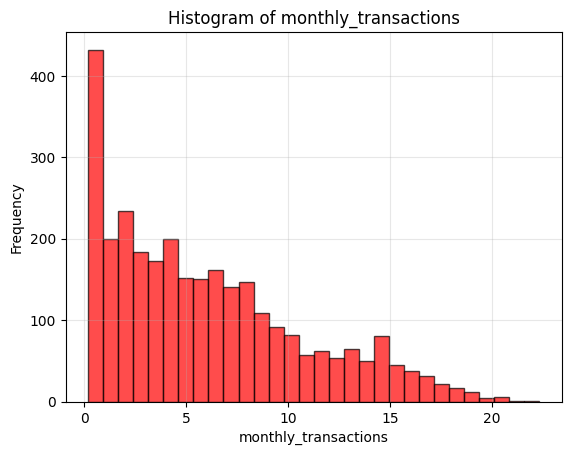

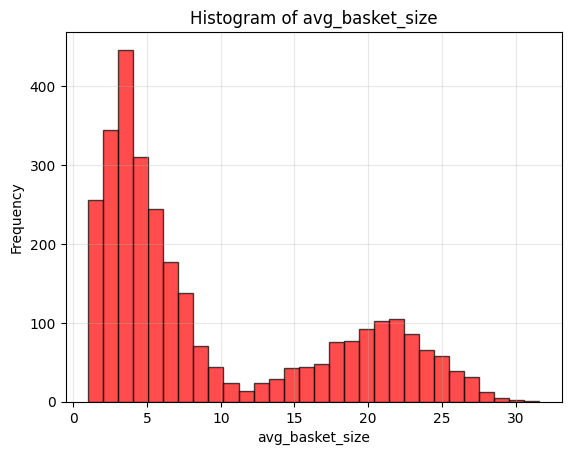

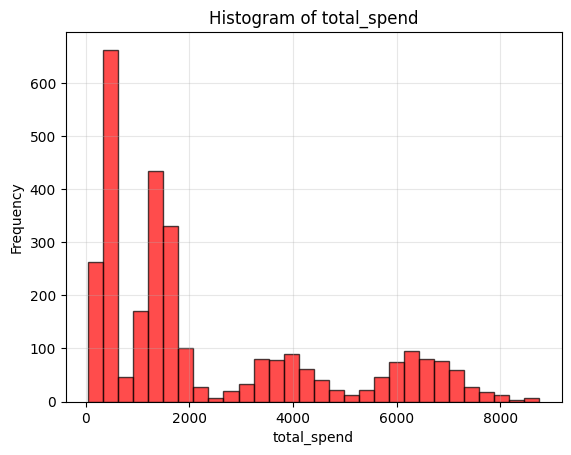

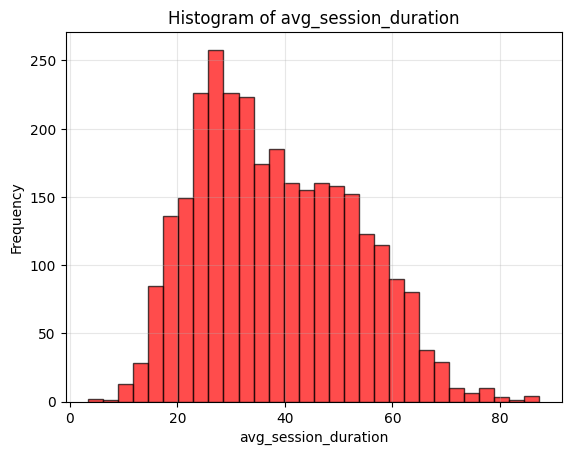

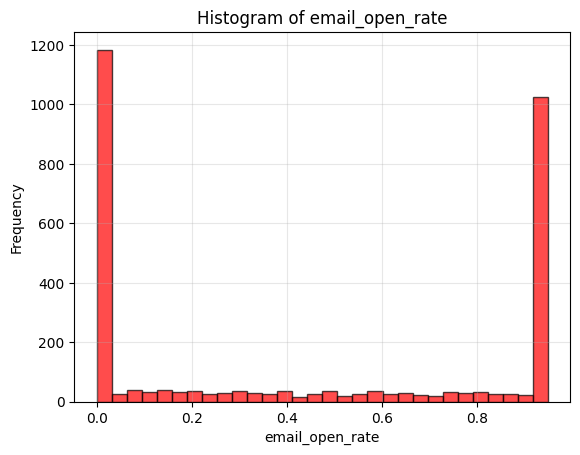

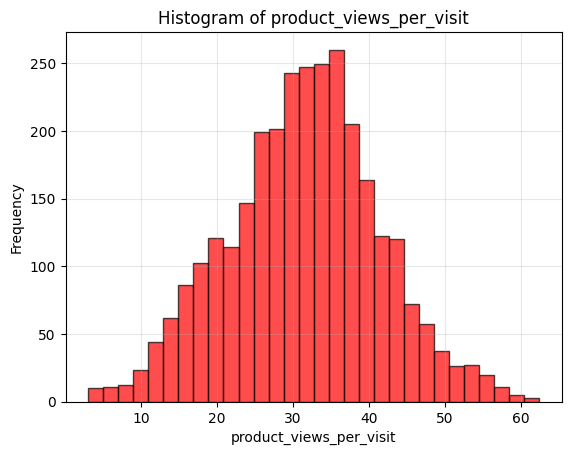

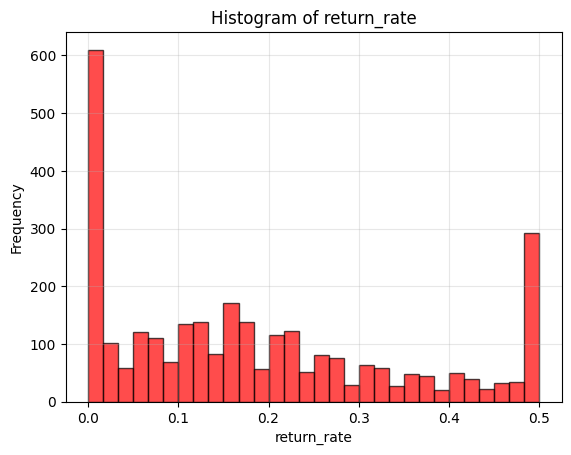

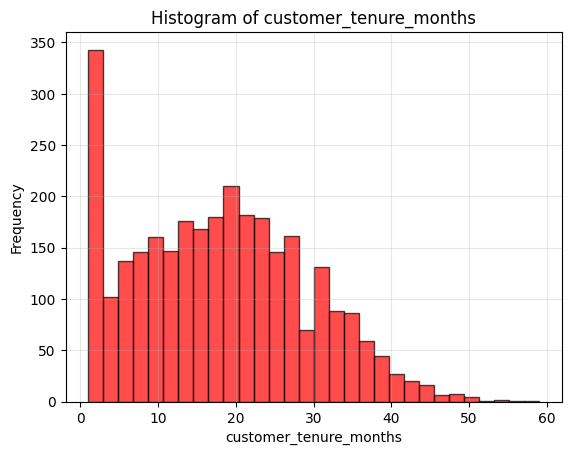

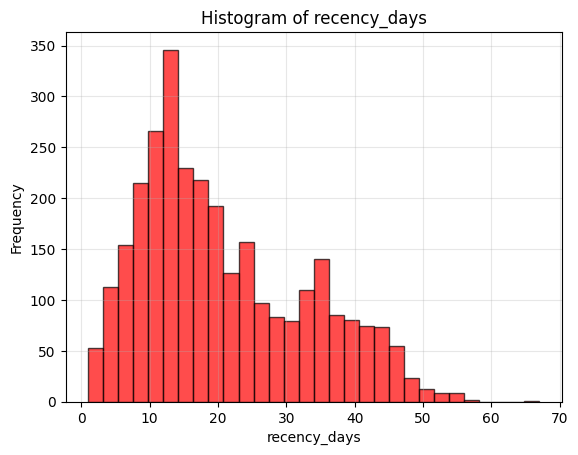

In [ ]:
lista_vars = [
    "monthly_transactions",
    "avg_basket_size",
    "total_spend",
    "avg_session_duration",
    "email_open_rate",
    "product_views_per_visit",
    "return_rate",
    "customer_tenure_months",
    "recency_days",
]


for col in lista_vars:
    plt.figure()
    plt.hist(
        df_cli[col],
        bins=30,
        color="red",
        edgecolor="black",
        alpha=0.7,
    )
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

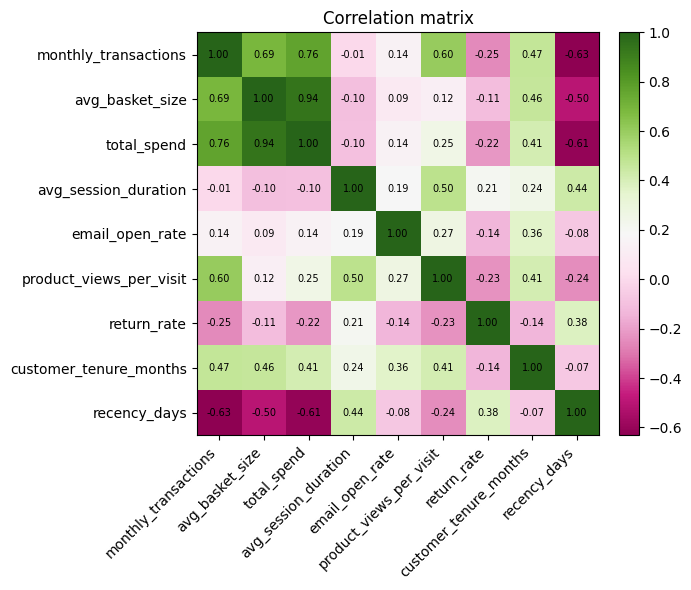

In [ ]:
tabla_corr = df_cli[lista_vars].corr()

plt.figure(figsize=(7, 6))
img = plt.imshow(tabla_corr, cmap="PiYG", interpolation="nearest")
plt.title("Correlation matrix")
plt.colorbar(img, fraction=0.046, pad=0.04)

ticks = range(len(lista_vars))
plt.xticks(ticks, lista_vars, rotation=45, ha="right")
plt.yticks(ticks, lista_vars)

for i in range(len(lista_vars)):
    for j in range(len(lista_vars)):
        val = tabla_corr.values[i, j]
        plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=7)

plt.tight_layout()
plt.show()


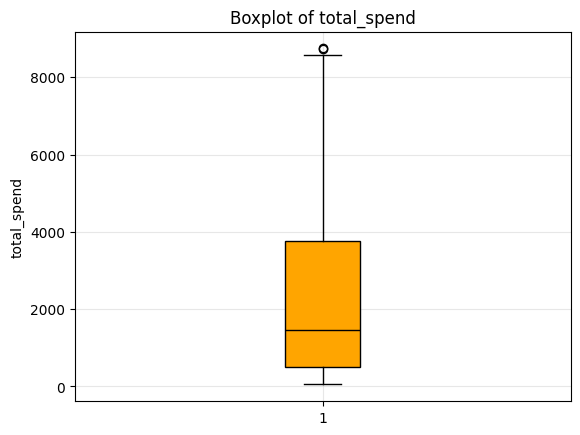

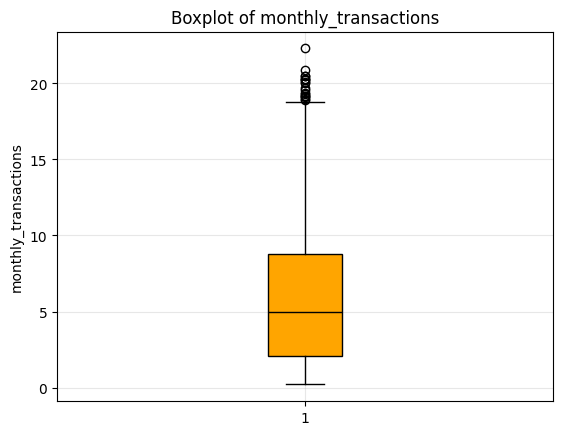

In [ ]:
vars_clave = ["total_spend", "monthly_transactions"]

for col in vars_clave:
    plt.figure()
    bp = plt.boxplot(df_cli[col], vert=True, patch_artist=True)
    for caja in bp["boxes"]:
        caja.set(facecolor="orange")
    for mediana in bp["medians"]:
        mediana.set(color="black")
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()

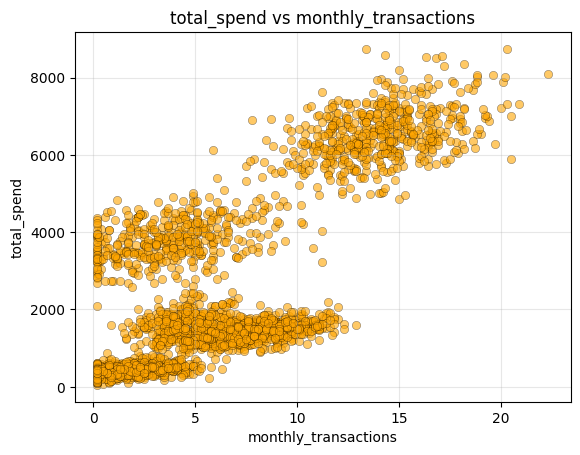

In [ ]:
plt.figure()
plt.scatter(
    df_cli["monthly_transactions"],
    df_cli["total_spend"],
    color="orange",
    alpha=0.6,
    edgecolors="black",
    linewidths=0.3,
)
plt.xlabel("monthly_transactions")
plt.ylabel("total_spend")
plt.title("total_spend vs monthly_transactions")
plt.grid(alpha=0.3)
plt.show()

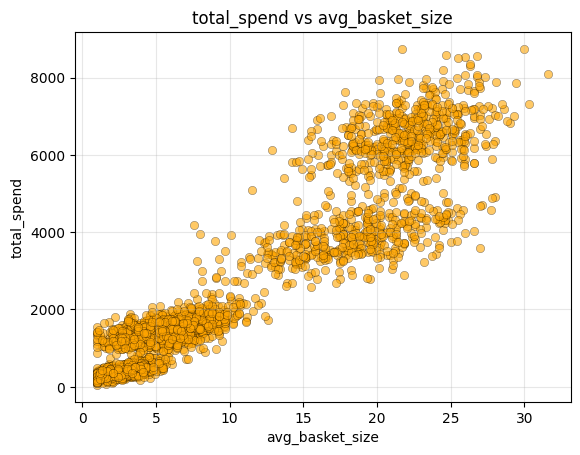

In [ ]:
plt.figure()
plt.scatter(
    df_cli["avg_basket_size"],
    df_cli["total_spend"],
    color="orange",
    alpha=0.6,
    edgecolors="black",
    linewidths=0.3,
)
plt.xlabel("avg_basket_size")
plt.ylabel("total_spend")
plt.title("total_spend vs avg_basket_size")
plt.grid(alpha=0.3)
plt.show()

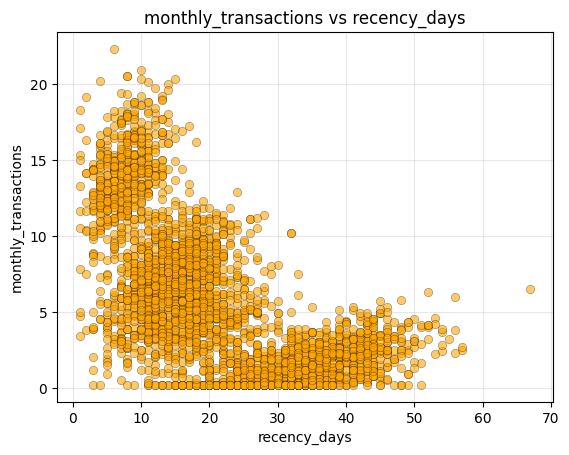

In [ ]:
plt.figure()
plt.scatter(
    df_cli["recency_days"],
    df_cli["monthly_transactions"],
    color="orange",
    alpha=0.6,
    edgecolors="black",
    linewidths=0.3,
)
plt.xlabel("recency_days")
plt.ylabel("monthly_transactions")
plt.title("monthly_transactions vs recency_days")
plt.grid(alpha=0.3)
plt.show()

### 2. Exploratory Data Analysis (EDA)

- **Distributions:**  
  Behavioral variables are continuous and mostly right-skewed.  
  - `total_spend` is concentrated around **500–4,000**, with a small high-spend tail above **8,000**.  
  - `monthly_transactions` se centra en **4–6** compras al mes, con pocos clientes que superan las **20**.

- **Correlations:**  
  - `avg_basket_size` y `total_spend` tienen una correlación muy alta (**ρ ≈ 0.94**).  
  - `monthly_transactions` se correlaciona fuertemente con `total_spend` (**ρ ≈ 0.76**) y `avg_basket_size` (**ρ ≈ 0.69**).  
  - `recency_days` se correlaciona negativamente con `monthly_transactions` (**ρ ≈ -0.63**) y `total_spend` (**ρ ≈ -0.61**): clientes más recientes compran más y gastan más.  
  - `avg_session_duration` y `product_views_per_visit` muestran correlación moderada (**ρ ≈ 0.50**).

- **Outliers:**  
  - `total_spend` presenta algunos outliers por encima de **8,500**, muy por encima de la mediana (~**1,400**).  
  - En `monthly_transactions` hay clientes extremos con **18–22** compras mensuales.

- **Scatter plots:**  
  - `total_spend` crece claramente con `monthly_transactions` y con `avg_basket_size`, indicando que frecuencia y tamaño de carrito impulsan el valor del cliente.  
  - `monthly_transactions` disminuye a medida que aumenta `recency_days`, confirmando que clientes más recientes son más activos.




# Section 3

In [ ]:
tab_nulos = df_cli.isna().sum()
tab_nulos

,0
customer_id,0
monthly_transactions,0
avg_basket_size,0
total_spend,0
avg_session_duration,0
email_open_rate,0
product_views_per_visit,0
return_rate,0
customer_tenure_months,0
recency_days,0


In [ ]:

esc = StandardScaler()
dat_esc = esc.fit_transform(df_cli[lista_vars])

df_esc = pd.DataFrame(dat_esc, columns=lista_vars)

df_esc.head()

,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
0,-0.881806,-0.814720,-0.818692,-0.023831,1.184799,-1.411249,-1.145657,0.452593,1.022062
1,-0.128000,-0.626277,-0.547025,-1.286759,-1.038395,-1.531702,1.381211,-1.504629,-1.052040
2,-0.651476,-0.638840,-0.754970,1.804276,0.178511,0.556143,-0.467717,1.253275,1.519847
3,1.253976,1.672732,1.775871,-0.037786,-0.640561,1.088142,-1.145657,0.274664,-1.300932
4,-0.798050,1.019462,0.752305,-1.112321,0.201913,-1.300834,-0.221193,0.185699,-0.222399


### 3. Data preprocessing

- **Missing values:**  
  The `isna().sum()` table shows **0 missing values** in all columns, so no imputation is needed.

- **Standardization:**  
  We use `StandardScaler` on the 9 behavioral variables and build a standardized dataset (`df_esc`) where each feature has mean ≈ 0 and standard deviation ≈ 1.

- **Why it matters for clustering:**  
  Clustering methods based on distances (hierarchical and K-Means) are sensitive to scale.  
  Without standardization, high-range variables like `total_spend` would dominate the distances and hide the effect of variables on smaller scales (e.g., `email_open_rate`).  
  Standardizing ensures all features contribute more fairly to the clustering process.


# Section 4

In [ ]:

lista_met = ["single", "complete", "average", "ward"]
dic_enl = {}

mat_dat = df_esc.values

for met in lista_met:
    dic_enl[met] = linkage(mat_dat, method=met)


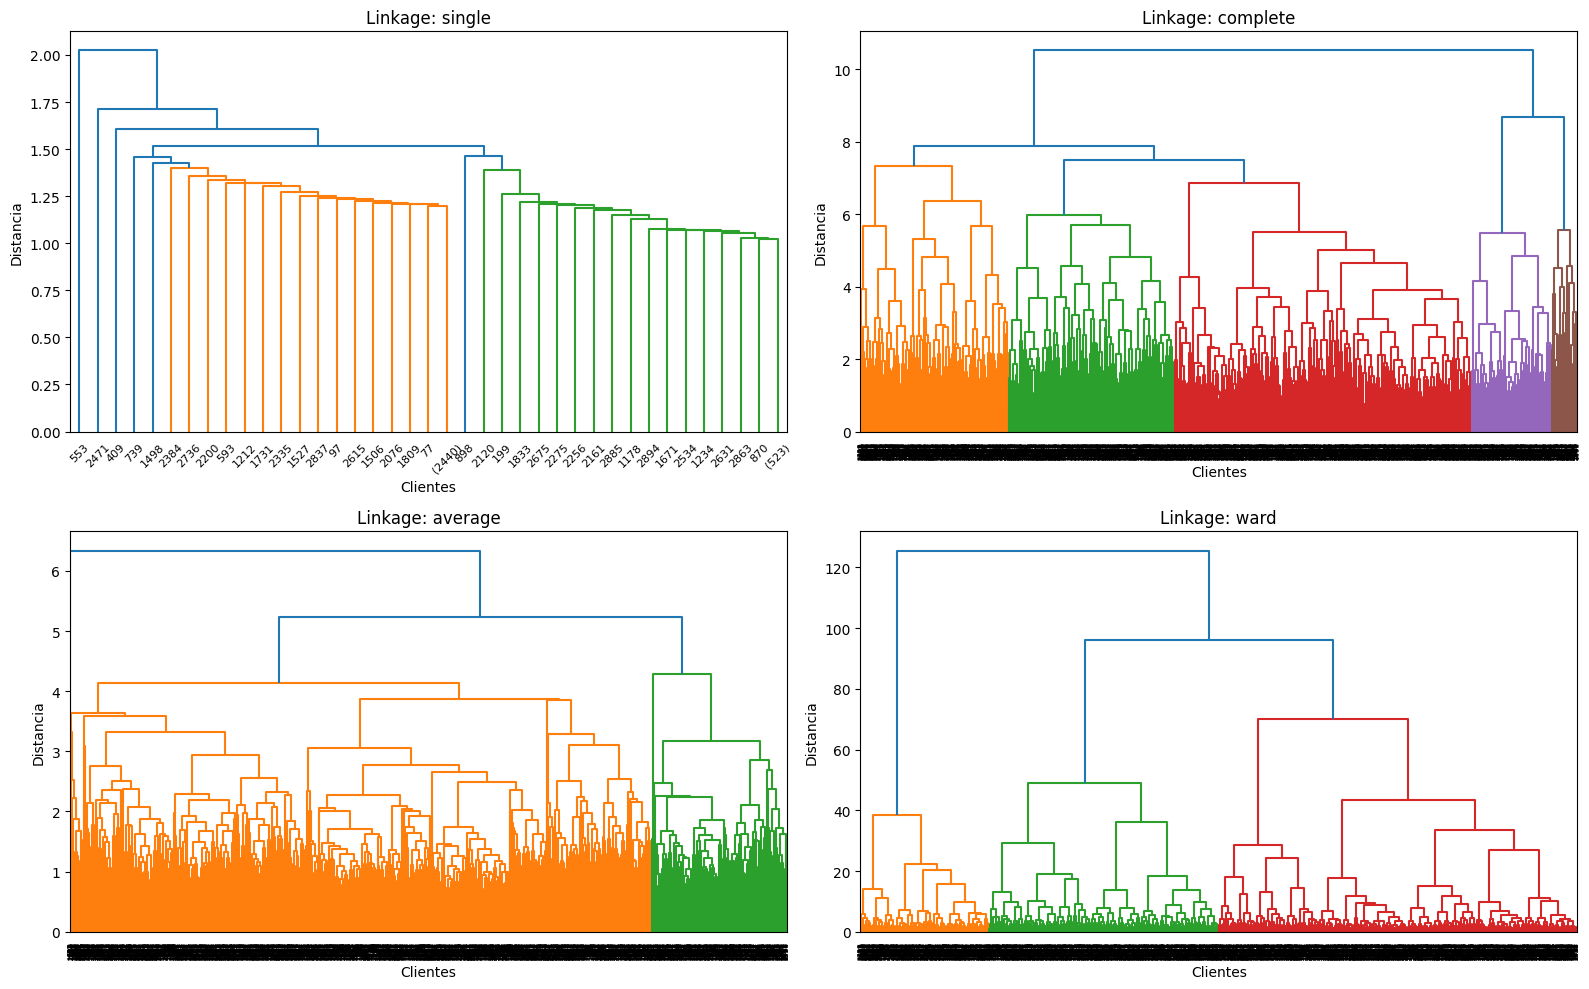

In [ ]:
fig, ejes = plt.subplots(2, 2, figsize=(16, 10))

for ax, met in zip(ejes.flat, lista_met):
    dendrogram(
        dic_enl[met],
        ax=ax,
        truncate_mode="level",
        p=20,
    )
    ax.set_title(f"Linkage: {met}")
    ax.set_xlabel("Clientes")
    ax.set_ylabel("Distancia")

plt.tight_layout()
plt.show()

### 4. Hierarchical clustering – linkage comparison

- **Best linkage for this data:**  
  In the figure, the **Ward** dendrogram (bottom-right) shows the cleanest block structure, with a few large vertical jumps and compact subtrees. This is the most suitable option for customer segmentation.

- **Where to cut the dendrogram:**  
  In the Ward plot, a reasonable cut is at a **mid–high distance level** (before the big jumps near the top), which would give around **4–6 clusters** that are still well separated and usable for business analysis.

- **Meaning of merge height:**  
  The **height** at which branches merge represents how different the groups are when they are joined.  
  - Small merges at low height = very similar customers.  
  - Large vertical jumps = clusters that are much more dissimilar.

- **Chaining effect:**  
  The **single** linkage dendrogram (top-left) shows many gradual, uneven merges and long chains of points, which is the typical **“chaining effect”**: clusters are formed by linking nearest neighbors one by one instead of creating compact, well-separated groups. Single linkage is the method most susceptible to this issue.



# Section 5

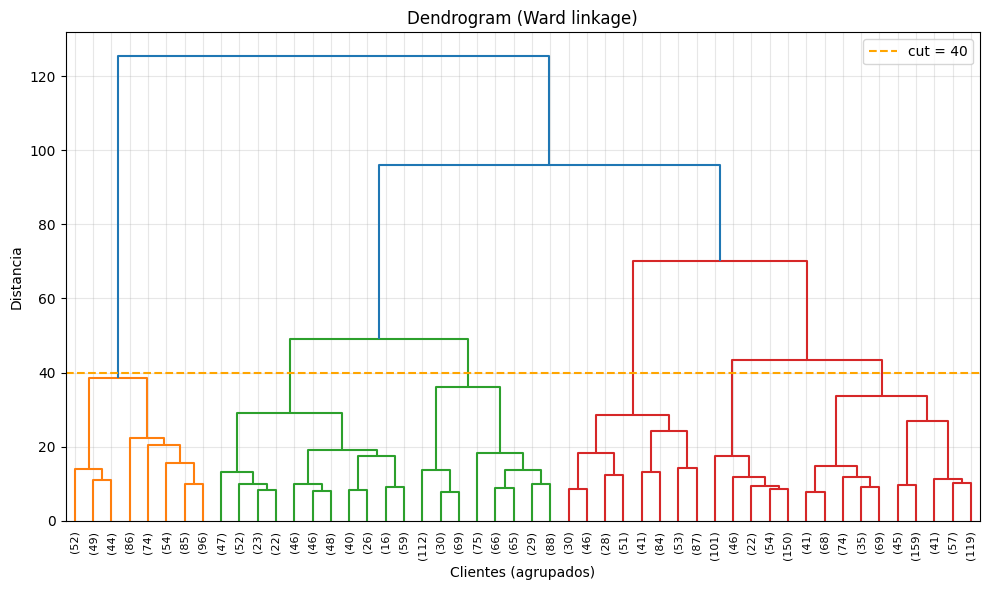

In [ ]:
enl_ward = linkage(df_esc.values, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(
    enl_ward,
    truncate_mode="lastp",
    p=50,
)
alt_corte = 40
plt.axhline(
    y=alt_corte,
    color="orange",
    linestyle="--",
    label=f"cut = {alt_corte}",
)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Clientes (agrupados)")
plt.ylabel("Distancia")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
lista_k = [3, 4, 5, 6]
res_sil = []

for k in lista_k:

    etiq = fcluster(enl_ward, k, criterion="maxclust")
    sil = silhouette_score(df_esc, etiq)
    res_sil.append({"k": k, "silhouette": sil})

In [ ]:
tab_sil = pd.DataFrame(res_sil)
tab_sil

,k,silhouette
0,3,0.294781
1,4,0.315700
2,5,0.300267
3,6,0.247512


### 5. Optimal number of clusters

- The focused Ward dendrogram, with a horizontal cut around distance ≈ 40, suggests a structure with **4–6 clusters**.
- The silhouette analysis for k = 3, 4, 5, 6 shows the **highest score for k = 4** (≈ 0.32), followed by k = 5 and k = 3, while k = 6 drops noticeably.
- This indicates that **4 clusters** is the most natural and well-separated partition for the hierarchical (Ward) solution, and will be a strong candidate when comparing with K-Means.


# Section 6

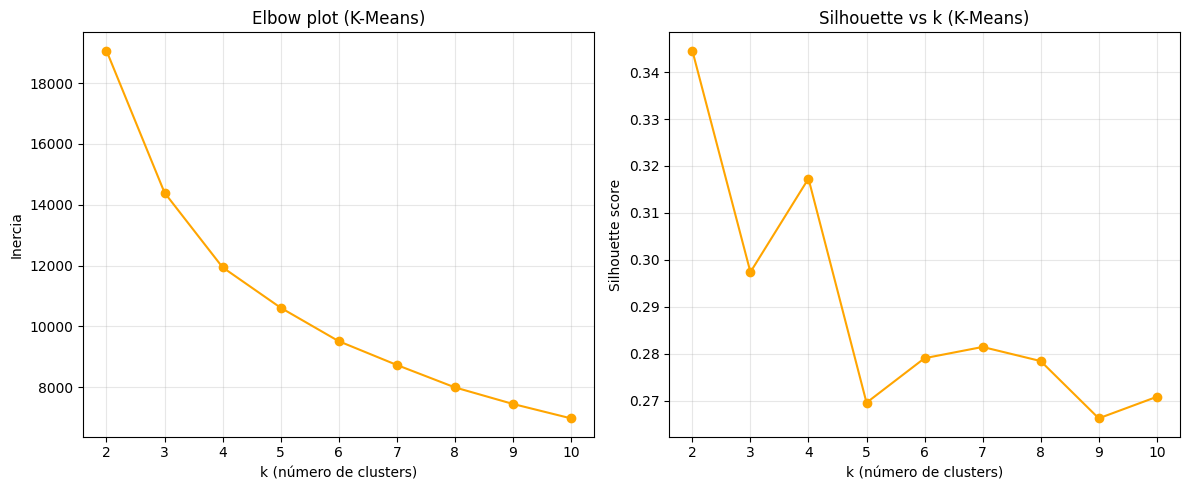

In [ ]:

lista_k = list(range(2, 11))
lista_iner = []
lista_sil = []

for k in lista_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiq_km = km.fit_predict(df_esc)
    lista_iner.append(km.inertia_)
    sil = silhouette_score(df_esc, etiq_km)
    lista_sil.append(sil)

fig, ejes = plt.subplots(1, 2, figsize=(12, 5))


ejes[0].plot(lista_k, lista_iner, marker="o", color="orange")
ejes[0].set_xlabel("k (número de clusters)")
ejes[0].set_ylabel("Inercia")
ejes[0].set_title("Elbow plot (K-Means)")
ejes[0].grid(alpha=0.3)

ejes[1].plot(lista_k, lista_sil, marker="o", color="orange")
ejes[1].set_xlabel("k (número de clusters)")
ejes[1].set_ylabel("Silhouette score")
ejes[1].set_title("Silhouette vs k (K-Means)")
ejes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
tab_km = pd.DataFrame(
    {
        "k": lista_k,
        "inercia": lista_iner,
        "silhouette": lista_sil,
    }
)
tab_km

,k,inercia,silhouette
0,2,19065.449551,0.344552
1,3,14397.532007,0.297391
2,4,11944.281914,0.317311
3,5,10616.552893,0.269579
4,6,9517.151689,0.279059
5,7,8736.425526,0.281452
6,8,7999.739224,0.278445
7,9,7454.649034,0.266246
8,10,6981.049230,0.270829


### 6. K-Means – Elbow method and silhouette

- **Elbow (inertia):**  
  The inertia curve drops quickly from **k = 2** to **k = 4** and then flattens, so the “elbow” is around **k = 4**.

- **Silhouette scores:**  
  The highest silhouette is at **k = 2**, but this is a very coarse segmentation.  
  There is a clear local maximum around **k = 4** (better than k = 3, 5, 6, …), which indicates a good trade-off between compact and well-separated clusters.

- **Conclusion:**  
  Considering both plots (and interpretability for business), **k = 4** is a strong candidate for the final K-Means solution.


# Section 7

### 7. Final cluster selection

We select **k = 4** as the final number of clusters.

- **Hierarchical (Ward dendrogram):**  
  The Ward dendrogram shows clear large vertical jumps when going from ~4 clusters to fewer groups, suggesting that merging beyond 4 would join quite dissimilar segments.

- **Elbow plot (K-Means):**  
  The inertia curve has a visible bend around **k = 4**; after that point, reductions in inertia are much smaller.

- **Silhouette scores:**  
  Although k = 2 has the highest silhouette, it is too coarse.  
  **k = 4** provides a good compromise: a relatively high silhouette compared with neighboring k and more detailed segmentation.

- **Business considerations:**  
  Fewer clusters (e.g., k = 2) would over-generalize customer behavior, while many clusters (k > 6) would be hard to interpret and act on.  
  With **4 clusters**, each segment can be clearly profiled and used for targeted marketing strategies.


# Section 8

In [ ]:

km_fin = KMeans(n_clusters=4, random_state=42, n_init=10)
etiq_fin = km_fin.fit_predict(df_esc)

df_cli["clu_km"] = etiq_fin

conteo_clu = df_cli["clu_km"].value_counts().sort_index()
tab_clu = pd.DataFrame({
    "clu": conteo_clu.index,
    "conteo": conteo_clu.values
})
tab_clu["porc"] = (tab_clu["conteo"] / len(df_cli)) * 100

tab_clu

,clu,conteo,porc
0,0,525,17.500000
1,1,929,30.966667
2,2,433,14.433333
3,3,1113,37.100000


# Section 9

In [ ]:
tab_med = df_cli.groupby("clu_km")[lista_vars].mean().round(2)
tab_med

,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
clu_km,,,,,,,,,
0,14.07,22.03,6507.29,45.92,0.58,43.01,0.10,26.22,8.02
1,1.68,3.05,422.62,52.31,0.37,30.01,0.27,15.31,35.59
2,4.04,18.17,3875.94,22.36,0.45,16.55,0.24,21.60,19.84
3,6.59,5.56,1450.95,29.60,0.44,32.75,0.13,14.73,14.53


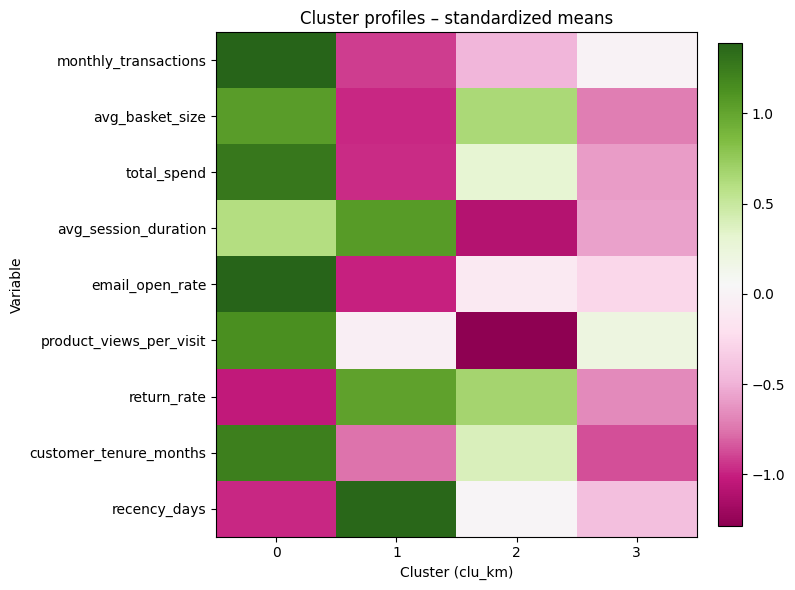

In [ ]:

tab_med = df_cli.groupby("clu_km")[lista_vars].mean()


tab_med_norm = (tab_med - tab_med.mean()) / tab_med.std()

mat_med = tab_med_norm.values
filas = tab_med_norm.index.astype(str)
cols = lista_vars

plt.figure(figsize=(8, 6))
img = plt.imshow(mat_med.T, cmap="PiYG", aspect="auto")
plt.colorbar(img, fraction=0.046, pad=0.04)
plt.yticks(range(len(cols)), cols)
plt.xticks(range(len(filas)), filas)
plt.title("Cluster profiles – standardized means")
plt.xlabel("Cluster (clu_km)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


### 9. Cluster profiling and interpretation

- Cluster 2 (17.5%) – High-value, highly engaged customers  
  This group has the highest monthly_transactions (around 14) and avg_basket_size (around 22), which leads to the highest total_spend (around 6,500). They also show long session duration, many product views, low recency_days (around 8) and a low return_rate (around 0.10). They are recent, very active and very profitable customers.

- Cluster 0 (14.4%) – Big-basket, stable customers  
  They buy with medium frequency (around 4 purchases per month) but with large baskets (around 18 items) and high total_spend (around 3,900). Their tenure is relatively long (around 22 months) and their engagement is above average, so they are established customers who generate good revenue even without buying very frequently.

- Cluster 1 (37.1%) – Active browsers with medium spend  
  These customers have a solid purchase rate (around 6.6 transactions) with small to medium baskets (around 5.6 items) and medium total_spend (around 1,450). They spend more time browsing products and have long sessions, forming a large “core” segment with clear potential to increase spend.

- Cluster 3 (31.0%) – Low-activity, at-risk customers  
  They have the lowest monthly_transactions (around 1.7), very small baskets (around 3 items) and the lowest total_spend (around 420). Recency_days is high (around 36) and return_rate is also high (around 0.27), indicating inactive and less satisfied customers with a higher risk of churn.


# Section 10

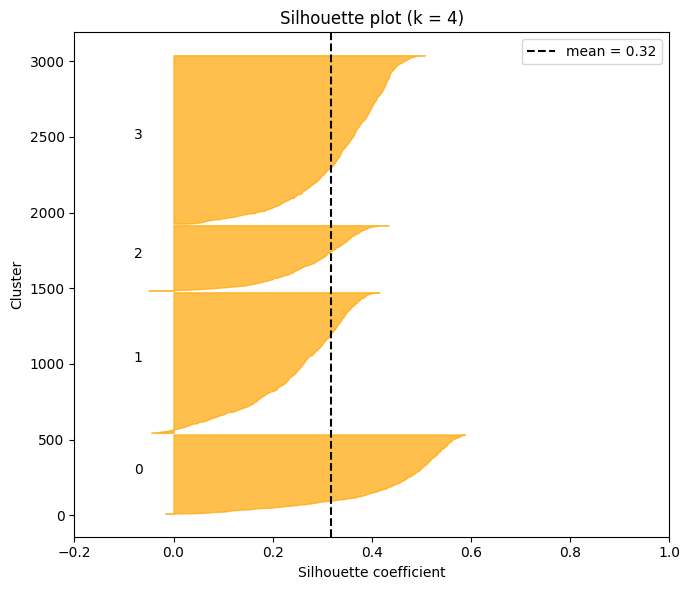

In [ ]:
val_sil = silhouette_samples(df_esc, etiq_fin)
sil_prom = val_sil.mean()
num_clu = len(np.unique(etiq_fin))

fig, ax = plt.subplots(figsize=(7, 6))

y_inf = 10

for c in range(num_clu):
    vals_c = val_sil[etiq_fin == c]
    vals_c = np.sort(vals_c)
    tam_c = len(vals_c)
    y_sup = y_inf + tam_c

    ax.fill_betweenx(
        np.arange(y_inf, y_sup),
        0,
        vals_c,
        color="orange",
        alpha=0.7,
    )
    ax.text(-0.08, (y_inf + y_sup) / 2, str(c))
    y_inf = y_sup + 10

ax.axvline(x=sil_prom, color="black", linestyle="--", label=f"mean = {sil_prom:.2f}")
ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette plot (k = 4)")
ax.set_xlim([-0.2, 1.0])
ax.legend()
plt.tight_layout()
plt.show()

### 10. Cluster validation – Silhouette analysis

- The silhouette plot for **k = 4** shows all clusters with **mostly positive** coefficients and an average around **0.32**, indicating reasonably good separation.
- Some clusters (especially 3 and 1) have many observations above the mean, suggesting well-defined segments.
- There are no clearly **negative** values, so only a few customers appear misassigned.
- Overall, the silhouette plot **confirms that k = 4 is an appropriate choice** for the segmentation.


# Section 11


In [ ]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df_esc)

pc1_var = pca.explained_variance_ratio_[0]
pc2_var = pca.explained_variance_ratio_[1]
var_tot = pc1_var + pc2_var

print(f"PC1 variance: {pc1_var:.2%}")
print(f"PC2 variance: {pc2_var:.2%}")
print(f"PC1 + PC2 variance: {var_tot:.2%}")

PC1 variance: 41.01%
PC2 variance: 20.97%
PC1 + PC2 variance: 61.98%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


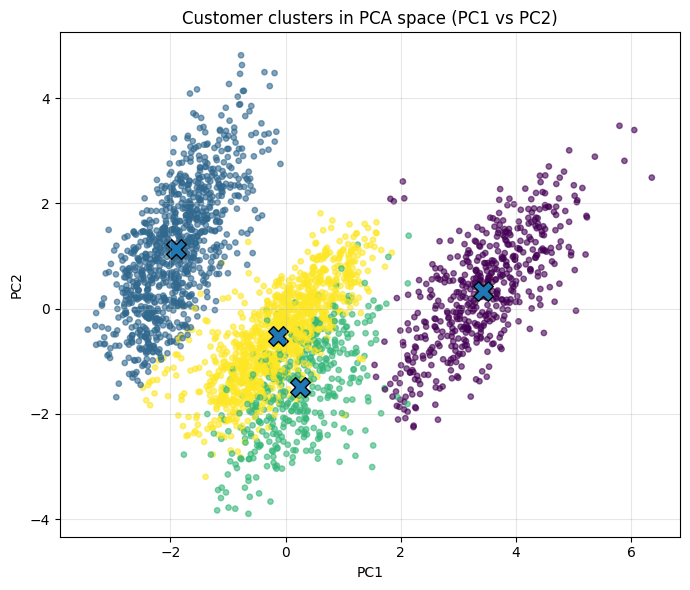

In [ ]:
centros_pc = pca.transform(km_fin.cluster_centers_)

plt.figure(figsize=(7, 6))

plt.scatter(
    pc[:, 0],
    pc[:, 1],
    c=etiq_fin,
    s=15,
    alpha=0.6,
)


plt.scatter(
    centros_pc[:, 0],
    centros_pc[:, 1],
    s=200,
    marker="X",
    edgecolors="black",
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer clusters in PCA space (PC1 vs PC2)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 11. Cluster visualization – PCA projection

- We applied PCA to the 9 standardized behavioral variables and kept the first **two components**. PC1 explains about **41%** of the variance and PC2 about **21%**, so together they capture roughly **62%** of the total information.
- The scatter plot of **PC1 vs PC2**, colored by cluster and with centroids marked, shows four clearly separated clouds, especially for the high-value and low-activity segments.
- This 2D view is only a **projection**: the true clustering structure lives in the original 9-dimensional space, so overlaps in the plot do not necessarily mean poor separation in the full feature space.


# Section 12

### 12. Technical conclusion

- **Optimal number of clusters:**  
  Both hierarchical clustering (Ward dendrogram with clear distance jumps) and K-Means (elbow at k = 4 and local maximum in silhouette) point to **k = 4** as the most appropriate segmentation.

- **Hierarchical vs K-Means:**  
  Ward linkage gave a good initial view of the structure and suggested the range of clusters (4–6).  
  K-Means, applied on standardized data, provided a stable partition with compact, well-separated groups and is easier to use operationally.

- **Quality metrics:**  
  For hierarchical (Ward) and K-Means with **k = 4**, the **average silhouette score is ≈ 0.32**, with almost all observations having positive silhouette values and very few possible misassignments.

- **Main segments identified (K-Means, k = 4):**  
  - **Cluster 2 – High-value, highly engaged:** very high spend, high frequency and basket size, recent and low returns.  
  - **Cluster 0 – Big-basket, stable customers:** medium frequency, large baskets, high spend, long tenure.  
  - **Cluster 1 – Medium-spend, active browsers:** moderate spend, average engagement, largest “core” group.  
  - **Cluster 3 – Low-activity, at-risk:** low spend and frequency, high recency and higher return rates, risk of churn.
